task 1

First 5 Rows:
    car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  pea

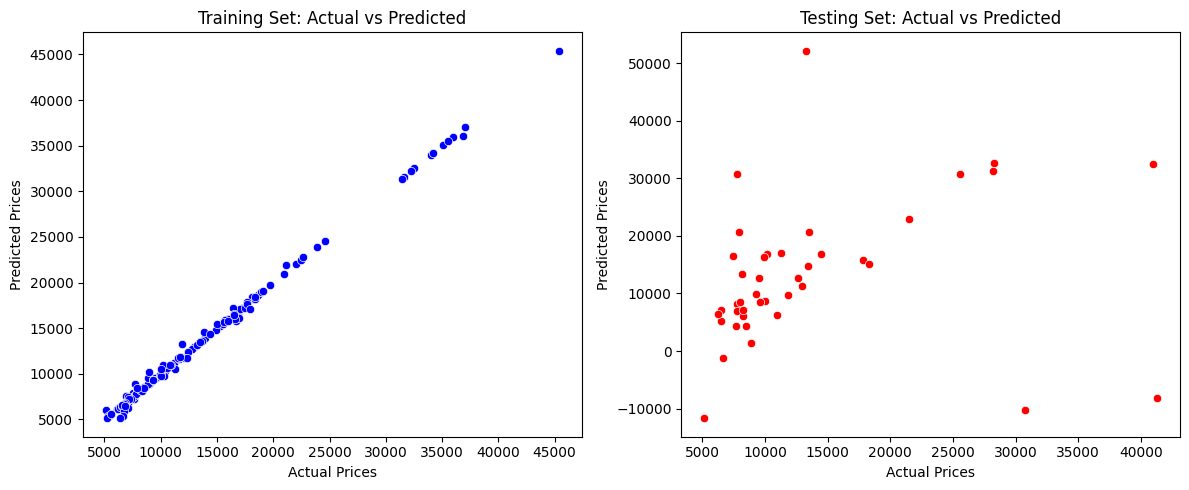

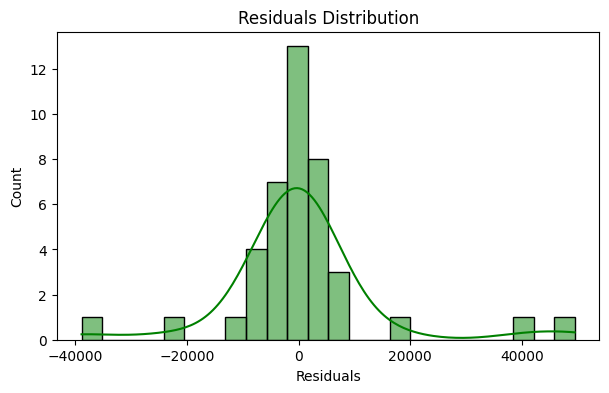

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df = pd.read_csv("car.csv")

print("First 5 Rows:\n", df.head(), "\n")
print("Dataset Info:\n")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum(), "\n")
print("Summary Statistics:\n", df.describe(), "\n")


df = df.dropna()

df = pd.get_dummies(df, drop_first=True)


X = df.drop('price', axis=1)
y = df['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)


print("=== TRAINING PERFORMANCE ===")
print("R2 Score:", r2_score(y_train, y_train_pred))
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("MSE:", mean_squared_error(y_train, y_train_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))

print("\n=== TEST PERFORMANCE ===")
print("R2 Score:", r2_score(y_test, y_test_pred))
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))


plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x=y_train, y=y_train_pred, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Training Set: Actual vs Predicted")


plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_test_pred, color='red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Testing Set: Actual vs Predicted")

plt.tight_layout()
plt.show()


residuals = y_test - y_test_pred
plt.figure(figsize=(7,4))
sns.histplot(residuals, kde=True, color='green')
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.show()


task 2

=== Dataset Loaded Successfully ===
   Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  Month  \
0   16          23.0             2.0         6.0      1.0          0     10   
1   19          22.0             2.0         3.0      1.0          0      5   
2    7          20.0             2.0         6.0      7.0          0      7   
3    7          22.0             3.0        21.0      1.0          0      6   
4   11          23.0             2.0        11.0      1.0          0      2   

        City                                    Company  MonthlyHours  \
0  Hyderabad                    Tata Power Company Ltd.           384   
1   Vadodara                                       NHPC           488   
2     Shimla                            Jyoti Structure           416   
3     Mumbai                            Power Grid Corp           475   
4     Mumbai  Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457   

   TariffRate  ElectricityBill  
0         8.4    

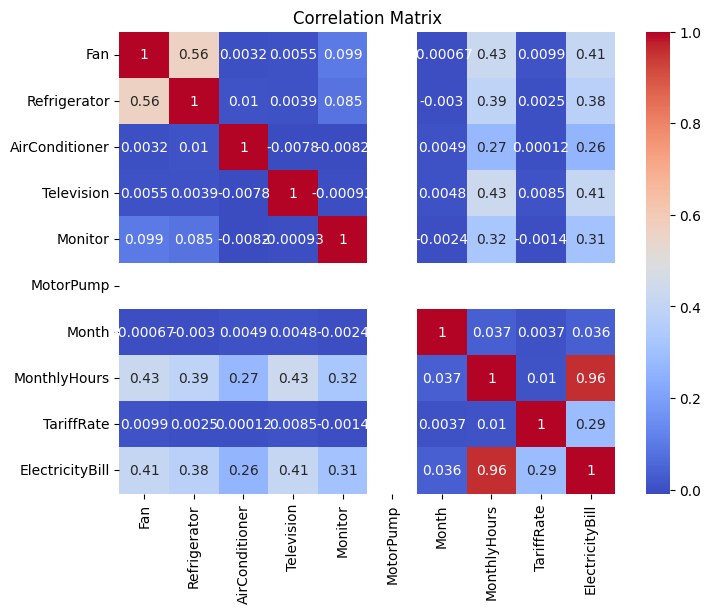

c:\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


=== Variance Inflation Factor (VIF) ===
           Feature         VIF
0              Fan   11.626723
1     Refrigerator  147.579550
2   AirConditioner    3.281633
3       Television    7.979144
4          Monitor    1.831978
5        MotorPump         NaN
6            Month    4.524076
7             City    3.587093
8          Company    3.806558
9     MonthlyHours   41.608634
10      TariffRate  107.288374 

                            OLS Regression Results                            
Dep. Variable:        ElectricityBill   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.039e+06
Date:                Mon, 03 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:31:01   Log-Likelihood:            -2.5748e+05
No. Observations:               45345   AIC:                         5.150e+05
Df Residuals:                   4

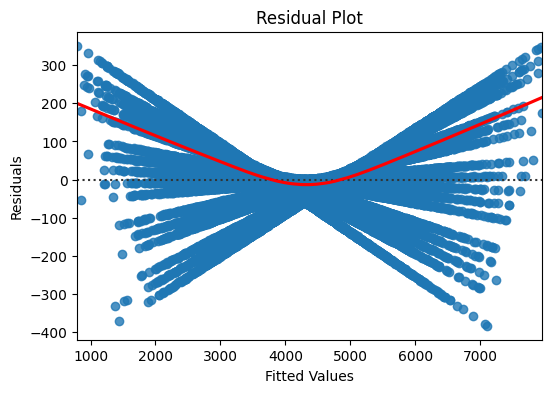

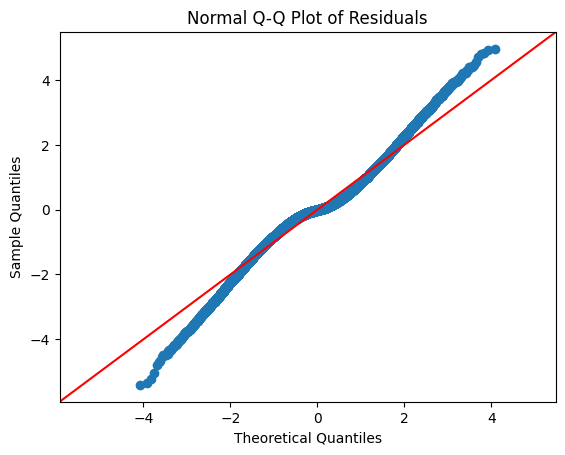

=== Sample Predictions ===
0    3231.533146
1    3791.810335
2    3137.029101
3    4403.658903
4    4254.071924
dtype: float64


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv("electricity.csv")
print("=== Dataset Loaded Successfully ===")
print(df.head(), "\n")

df = df.dropna()

X = df.drop(columns=['ElectricityBill'])
y = df['ElectricityBill']

labelencoder = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = labelencoder.fit_transform(X[col])

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print("=== Variance Inflation Factor (VIF) ===")
print(vif_data, "\n")

X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()
print(model.summary())

plt.figure(figsize=(6, 4))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

sm.qqplot(model.resid, line='45', fit=True)
plt.title("Normal Q-Q Plot of Residuals")
plt.show()

y_pred = model.predict(X_const)
print("=== Sample Predictions ===")
print(y_pred.head())


task3


### **Assumptions of Classifiers**

#### **1. Logistic Regression**

* The dependent variable is binary or categorical.
* Linearity exists between independent variables and the log-odds of the dependent variable.
* Independence of observations  no correlation between samples.
* No multicollinearity independent variables should not be highly correlated.
* Large sample size helps achieve stable and reliable estimates.
* Homoscedasticity  variance of residuals should be constant across predicted values.

---

#### **2. Decision Tree**

* No assumptions** about data distribution (non-parametric model).
* Works with both categorical and numerical variables.
* Assumes that features are sufficient to split data effectively using metrics like Gini index or entropy.
* Data should have meaningful patterns that can be captured through recursive partitioning.
* Does not assume linear relationships between featuresnd target.

---

#### **3. Random Forest**

* Inherits assumptions of Decision Trees  no requirement for linearity or normality.
* Assumes that the trees are independent and diverse** due to random sampling (bagging).
* Works best when there is low noise and features have predictive power.
* Assumes sufficient number of trees to stabilize predictions and reduce overfitting.

---

#### **4. K-Nearest Neighbors (KNN)**

* Assumes similar instances are close in feature space (proximity implies similarity).
* Assumes that all features are equally important (distance metric treats all equally).
* Data should be normalized or scaled for fair distance computation.
* Works best when decision boundaries are smooth and the dataset is relatively noise-free.
* Assumes locality the class of a sample depends on nearby points.

---

#### **5. Support Vector Machine (SVM)**

* Assumes data is linearly separable in its original or transformed feature space.
* Requires independent observations.
* Assumes properly scaled features, as SVM is sensitive to the magnitude of features.
* Kernel functions assume that the chosen kernel (linear, RBF, polynomial) is suitable for data structure.
* Assumes minimal noise and outliers, since SVM is sensitive to misclassified points.




